Датасет `data_bin.csv` містить дані про студентів та підсумкові семестрові оцінки. 

Цільовою змінною є "PASSED" -- приймає два значення 

   * `True` якщо оцінка за семестр є більшою за 10
   * `False` якщо оцінка за семестр є меншою за 11

Файл `attributes.csv` містить повні назви ознак.

Датасет `predict.csv` не містить значень цільової змінної і призначений для зовнішнього оцінювання.  

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import ipywidgets as widgets
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

## Завдання 1

[2 бали] 

Імпортувати датасет `data.csv` у об'єкт `DataFrame` і провести попередній аналіз даних засобами `pandas`, `matplotlib`, `seaborn`. 

Цільовою змінною є "PASSED"

In [2]:
DataFrame = pd.read_csv("data_bin.csv")
DataFrame

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,PASSED
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,-2.302585,True
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,2.208274,True
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,2.493205,True
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,2.646175,True
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,2.406945,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,2.208274,False
940,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,2.646175,True
941,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,2.091864,False
942,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,2.406945,False


In [3]:
DataFrame.shape

(944, 32)

In [4]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      944 non-null    object 
 1   sex         944 non-null    object 
 2   age         944 non-null    int64  
 3   address     944 non-null    object 
 4   famsize     944 non-null    object 
 5   Pstatus     944 non-null    object 
 6   Medu        944 non-null    int64  
 7   Fedu        944 non-null    int64  
 8   Mjob        944 non-null    object 
 9   Fjob        944 non-null    object 
 10  reason      944 non-null    object 
 11  guardian    944 non-null    object 
 12  traveltime  944 non-null    int64  
 13  studytime   944 non-null    int64  
 14  failures    944 non-null    int64  
 15  schoolsup   944 non-null    object 
 16  famsup      944 non-null    object 
 17  paid        944 non-null    object 
 18  activities  944 non-null    object 
 19  nursery     944 non-null    o

Отже, маємо 944 об'єкта, 31 ознаку і цільову змінну. Всі значення є non-null. Подивимось на опис кожної ознаки:

In [5]:
def get_describe(column):
    return DataFrame[column].describe()
widgets.interact(get_describe, column=widgets.Dropdown(options=DataFrame.columns, description="Column:"))

interactive(children=(Dropdown(description='Column:', options=('school', 'sex', 'age', 'address', 'famsize', '…

<function __main__.get_describe(column)>

Подивимось на цільову змінну:

<Axes: xlabel='PASSED', ylabel='count'>

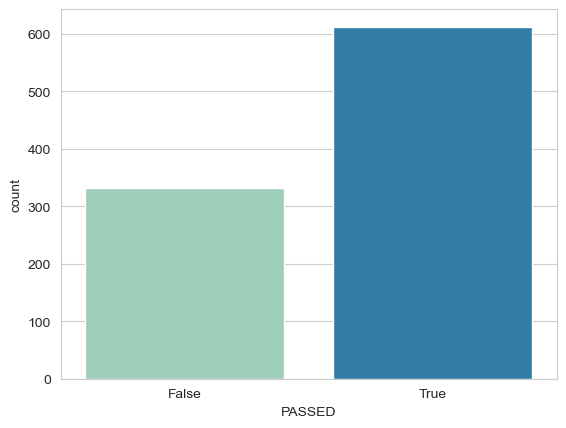

In [6]:
sns.countplot(x='PASSED',data=DataFrame, palette="YlGnBu")

Бачимо, що є набагато більше учнів, які здали екзамен. Це може повпливати на результати навчання (якщо наприклад в навчальну чи тестову вибірки попаде дуже мало об'єктів меншого за розмірами класу), тому під час навчання пробуватимемо ставити вагу класів `balanced`(Хоча таке співвідношення розмірів і не вважається надто неврівноваженим).

Можемо побудувати аналогічний графік, який буде показувати розподіл `Passed` відносно інших ознак.

In [7]:
widgets.interact(lambda hue: sns.countplot(x='PASSED',data=DataFrame, hue=hue, palette="YlGnBu"), hue=widgets.Dropdown(options=DataFrame.drop(columns="PASSED").columns, description="Column:"))

interactive(children=(Dropdown(description='Column:', options=('school', 'sex', 'age', 'address', 'famsize', '…

<function __main__.<lambda>(hue)>

Побудуємо інший графік, який показуватиме середнє значення `Passed` в залежності від значень решти ознак

In [8]:
widgets.interact(lambda x: sns.barplot(x=x, y='PASSED',data=DataFrame, palette="YlGnBu"), x=widgets.Dropdown(options=DataFrame.drop(columns="PASSED").columns, description="Column:"))

interactive(children=(Dropdown(description='Column:', options=('school', 'sex', 'age', 'address', 'famsize', '…

<function __main__.<lambda>(x)>

Можемо зрозуміти, що наприклад для ознаки `studytime`, навчаючись 5-10 годин на тиждень, учень має найвищий шанс здати екзамен.

Побудуємо heatmap графік, який покаже шанс здати екзамен, в залежності від освіти батьків.

In [9]:
edu = DataFrame.groupby(["Medu", "Fedu"])["PASSED"].agg(["mean", "count"])
edu

mean  count
Medu Fedu                 
0    0     1.000000      1
     1     0.333333      3
     2     1.000000      5
1    0     0.750000      4
     1     0.458716    109
     2     0.574468     47
     3     0.384615     13
     4     0.666667      3
2    1     0.567568     74
     2     0.658915    129
     3     0.648649     37
     4     0.615385     13
3    1     0.545455     33
     2     0.597015     67
     3     0.617284     81
     4     0.722222     36
4    0     0.500000      2
     1     0.444444      9
     2     0.767442     43
     3     0.777778     81
     4     0.805195    154

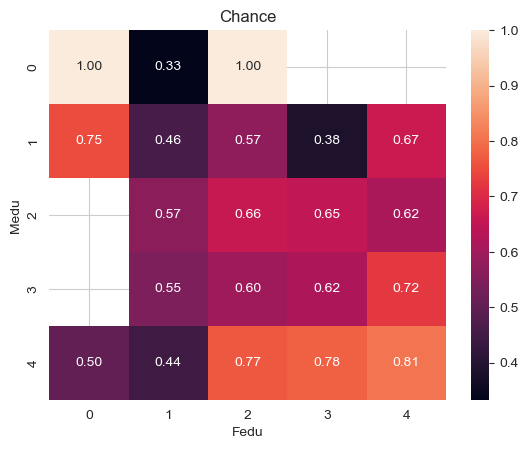

In [10]:
sns.heatmap(edu.drop(columns=["count"]).reset_index().pivot(index="Medu", columns="Fedu", values="mean"), annot=True, fmt=".2f")
plt.title("Chance")
plt.show()

Бачимо, що найвищі шанси мають учні, у яких освіта обох батьків висока. Значення 1 при `Medu` = 0 не є показовими, адже, як можна побачити у датафреймі зверху, кількість учнів з такими значеннями ознак дуже мала.

Подивимось на кореляцію між числовими ознаками

<Axes: >

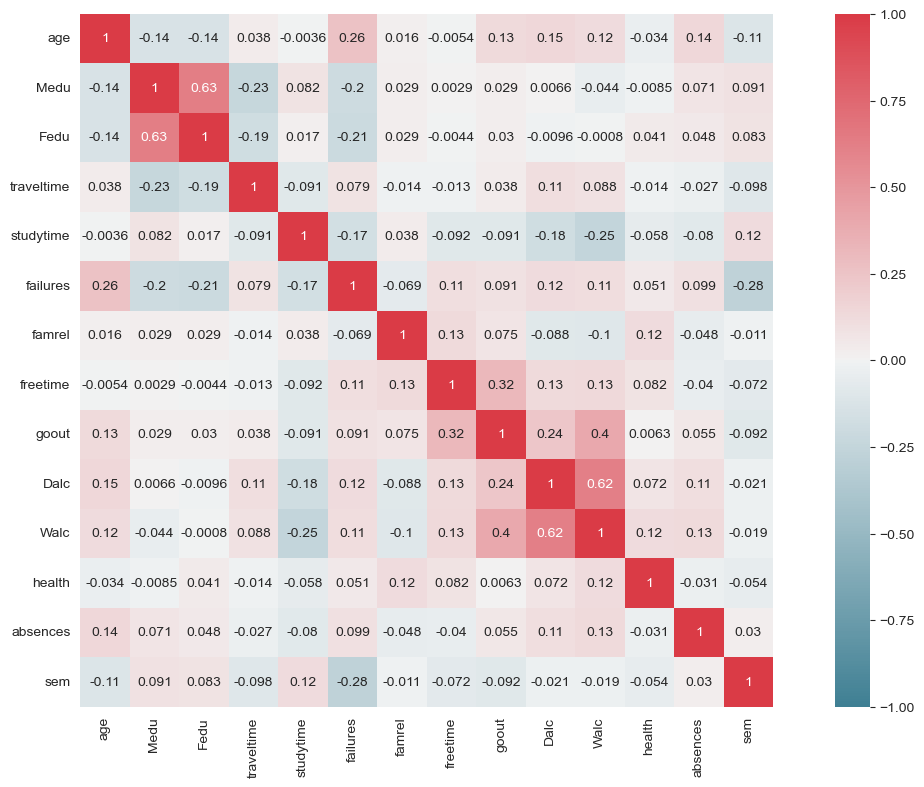

In [11]:
corr = DataFrame.drop(columns=["PASSED"]).corr()
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),vmin=-1, vmax=1,ax=ax,cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot=True)


Бачимо, що більшість ознак не є лінійно пов'язаними (як і передбачає регресія). Сильніший зв'язок можемо побачити лише в:
* `Dalc` i `Walc`, що є доволі логічно, бо споживання алкоголю в робочі дні/вихідні повинно бути пов'язаним
* `Walc` i `goout`. Учні які більше гуляють - споживають більше алкоголю на вихідних.
* `Medu` i `Fedu`. Освіта батьків корелює між собою.

(При навчанні спробували викидати ознаки з високою кореляцією, але це не дало бажаних результатів)

Далі спробуємо визначити об'єкти з аномальними значеннями числових ознак (які можуть зміщувати результати навчання) і видалити їх. Робити це будемо наступним чином:
* Напишемо функцію, яка в циклі буде проходити по кожній числовій ознаці і визначати викиди
* На кожній ітерації викидом вважатимемо те значення, яке `менше за 1-ий квартал - крок викиду` або `більше за 3-ій квартал + крок викиду`
* За крок викиду візьмемо 1,5 * IQR (Interquartile range)
* Для кожної ознаки записуватимемо індекси викидів в список. Після обробки всіх ознак видалятимемо ті рядки, поява яких в списку викидів перевищувала n разів

<Axes: xlabel='sem'>

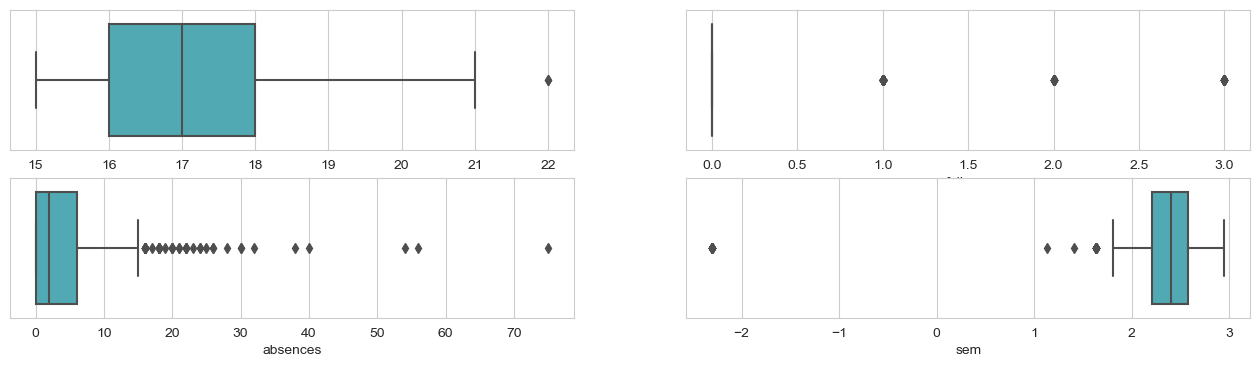

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,4))
sns.boxplot(x=DataFrame["age"], palette="YlGnBu", ax = ax[0][0])
sns.boxplot(x=DataFrame["failures"], palette="YlGnBu", ax = ax[0][1])
sns.boxplot(x=DataFrame["absences"], palette="YlGnBu", ax = ax[1][0])
sns.boxplot(x=DataFrame["sem"], palette="YlGnBu", ax = ax[1][1])

In [13]:
from collections import Counter
def outliers(df, features, n):
    outliers_ids = []
    for feature in features:
        q1 = np.percentile(df[feature], 25)
        q3 = np.percentile(df[feature], 75)
        step = 1.5*(q3 - q1)
        ids = df[(df[feature] < q1 - step) | (df[feature] > q3 + step)].index
        outliers_ids.extend(ids)
    outliers_ids = Counter(outliers_ids)
    delete = [key for key,value in outliers_ids.items() if value > n]
    return delete
delete = outliers(DataFrame, ["absences", "failures", "sem", "age"], 2)
delete

[596, 807]

Отже маємо два об'єкта, які мають аномальне значення в більше ніж 2-ох з 4-ох ознак. Видалимо їх (Після спроб на різних моделях протягом виконання роботи виявилось, що такий хід в основному не покращує результати. Можливо це пов'язано з малою кількістю власне числових ознак).

In [14]:
#DataFrame = DataFrame.drop(delete).reset_index(drop=True)

Також бачимо на boxplot, що ознака sem має аномальні від'ємні значення, які суперечать опису ознаки, тому поміняємо їх на 0

In [15]:
DataFrame["sem"] = DataFrame["sem"].map(lambda sem: 0 if sem < 0 else sem)

## Завдання 2

[3 бали] 

Навчити модель логістичної регресії (`sklearn.linear_model.LogisticRegression`) лише за числовими ознаками. Дослідити вплив коефіцієнта та типу регуляризації на результат

* Знайти оптимальні параметри коефіцієнта та типу регуляризації (`penalty`, `C`) за допомогою процедури крос-валідації.

* Для всіх моделей знайти середню точність (accuracy) [частку правильних відповідей] на відкладеній вибірці.

* Зробити висновки.

Поділимо дані на навчальну і тестову вибірки

In [16]:
from sklearn.model_selection import train_test_split
y = DataFrame["PASSED"]
X = DataFrame.drop(columns=["PASSED"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

Виділимо числові ознаки:

In [17]:
numeric_features = X.select_dtypes([np.number]).columns

Навчимо модель логістичної регресії лише за числовими ознаками

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score


def output(model, y_pred, y_train_pred, all_metrics=False):
    global y_train, y_test, y_final
    print("-"*10 + f"{model}" + "-"*10)
    print(f"Test Accuracy: {round(accuracy_score(y_test, y_pred), 4)}")
    print(f"Train Accuracy: {round(accuracy_score(y_train, y_train_pred), 4)}")
    if all_metrics:
        for metric, scorer in {"Precision":precision_score,"Recall":recall_score,"F1":f1_score, "ROC_AUC":roc_auc_score}.items():
            print()
            print(f"Test {metric}: {round(scorer(y_test, y_pred), 4)}")
            print(f"Train {metric}: {round(scorer(y_train, y_train_pred), 4)}")
     

log_reg = LogisticRegression()
log_reg.fit(X_train[numeric_features], y_train)

y_train_pred = log_reg.predict(X_train[numeric_features])
y_pred = log_reg.predict(X_test[numeric_features])

output(log_reg, y_pred, y_train_pred)

----------LogisticRegression()----------
Test Accuracy: 0.873
Train Accuracy: 0.8834


Підберемо найкращі гіперпараметри коефіцієнта та типу регуляризації (`C`, `penalty`) методом крос-валідації. UPD: Спробував підбирати по площі під ROC-кривою, це в основному не погіршило accuracy, але збільшило площу

In [19]:
from sklearn.model_selection import GridSearchCV
def get_best_params_numeric(model=LogisticRegression(), X_tr=X_train):
    global y_train
    #solver = ["lbfgs", "saga", "newton-cg"]
    penalty = ["l1", "l2", "elasticnet", None]
    c_val = np.logspace(-2, 3, 100)
    searcher = GridSearchCV(model, [{"penalty": penalty, "C": c_val}], n_jobs=-1, scoring= "roc_auc", cv = 10)
    searcher.fit(X_tr, y_train)
    model.set_params(**searcher.best_params_)
    return model
get_best_params_numeric(model=log_reg, X_tr = X_train[numeric_features])

LogisticRegression(C=247.70763559917089)

Подивимось на результати після підбору

In [20]:
log_reg.fit(X_train[numeric_features], y_train)

y_train_pred = log_reg.predict(X_train[numeric_features])
y_pred = log_reg.predict(X_test[numeric_features])

output(log_reg, y_pred, y_train_pred)

----------LogisticRegression(C=247.70763559917089)----------
Test Accuracy: 0.9048
Train Accuracy: 0.8927


Як бачимо, результати покращились. Спробуємо також використати скейлинг і бінаризацію ознак:

In [21]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,KBinsDiscretizer

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

binn = KBinsDiscretizer(n_bins=6, strategy='quantile')
X_train_preprocessed = binn.fit_transform(X_train[numeric_features])
X_test_preprocessed = binn.transform(X_test[numeric_features])


Зразу підберемо найкращі гіперпараметри для таких кроків при навчанні

In [22]:
get_best_params_numeric(model=log_reg, X_tr=X_train_preprocessed)

LogisticRegression(C=0.41320124001153363)

Подивимось на результат

In [23]:
log_reg.fit(X_train_preprocessed, y_train)

y_train_pred = log_reg.predict(X_train_preprocessed)
y_pred = log_reg.predict(X_test_preprocessed)

output(log_reg, y_pred, y_train_pred, all_metrics=True)

----------LogisticRegression(C=0.41320124001153363)----------
Test Accuracy: 0.9206
Train Accuracy: 0.8993

Test Precision: 0.9407
Train Precision: 0.9195

Test Recall: 0.9328
Train Recall: 0.927

Test F1: 0.9367
Train F1: 0.9232

Test ROC_AUC: 0.9164
Train ROC_AUC: 0.8872


Як бачимо результат знову покращився. Додатково можемо спробувати використати `PolynomialFeatures` для утворення нових ознак і зв'язків.

In [24]:
pol = PolynomialFeatures(degree=2, include_bias=False)
X_train_preprocessed = pol.fit_transform(X_train_preprocessed)
X_test_preprocessed = pol.transform(X_test_preprocessed)

log_reg.fit(X_train_preprocessed, y_train)

y_train_pred = log_reg.predict(X_train_preprocessed)
y_pred = log_reg.predict(X_test_preprocessed)

output(log_reg, y_pred, y_train_pred)

----------LogisticRegression(C=0.41320124001153363)----------
Test Accuracy: 0.873
Train Accuracy: 0.9762


Бачимо, що використання `PolynomialFeatures` зумовило перенавчання моделі. Спробуємо перевести деякі числові ознаки в категорійні (бо вони більше схожі на них) і навчити модель по тих, що залишились. Це має зменшити ризик перенавчання, адже ми зменшимо кількість ознак. 

Також зразу підберемо найкращі параметри.

In [25]:
numeric_features = ["absences", "failures", "sem", "age"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

binn = KBinsDiscretizer(n_bins=6, strategy='quantile')
X_train_preprocessed = binn.fit_transform(X_train_scaled)
X_test_preprocessed = binn.transform(X_test_scaled)

pol = PolynomialFeatures(degree=2, include_bias=False)
X_train_preprocessed = pol.fit_transform(X_train_preprocessed)
X_test_preprocessed = pol.transform(X_test_preprocessed)

log_reg.fit(X_train_preprocessed, y_train)

y_train_pred = log_reg.predict(X_train_preprocessed)
y_pred = log_reg.predict(X_test_preprocessed)

output(log_reg, y_pred, y_train_pred, all_metrics=True)

----------LogisticRegression(C=0.41320124001153363)----------
Test Accuracy: 0.9101
Train Accuracy: 0.9033

Test Precision: 0.9474
Train Precision: 0.9251

Test Recall: 0.9076
Train Recall: 0.927

Test F1: 0.927
Train F1: 0.926

Test ROC_AUC: 0.9109
Train ROC_AUC: 0.8929


Справді, це допомогло уникнути перенавчання. В порівнянні з моделлю без `PolynomialFeatures` (яка показувала найкращий результат), частка правильних відповідей даної моделі нижча. Але точність і площа під ROC-кривою показують більш стабільний результат.  

##### Висновок.
Найкращою моделлю можемо вважати `LogisticRegression`, для якої ми підібрали найкращі гіперпараметри (найкращою виявилась `l2` регуляризація), використали скейлинг і бінаризацію, а також перевели більшість числових ознак в категорійні (для уникнення перенавчання). Модель з додатковим використанням `PolynomialFeatures` після спроб на різних поділах вибірки показує дуже подібні результати, тому, враховуючи стабільні результати на інших метриках, її також можемо вважати найкращою.

## Завдання 3

[6 балів] 

Навчити модель яка розв'язує задачу двокласової класифікації з використанням усіх ознак.
Використати `sklearn.linear_model.LogisticRegression(solver='saga')` та `sklearn.linear_model.SGDClassifier(loss='log_loss')`.

* Здійснити пошук оптимальних гіперпараметрів моделі використовуючи `GridSearchCV`
    * (`penalty`, `C`) для `LogisticRegression(solver='saga')`
    * (`penalty`, `alpha`, `l1_ratio`, `max_iter`, `learning_rate`) для `SGDClassifier(loss='log_loss')`
* Мета -- отримати якомога кращий результат. 
* Оцінити точність (precision), повноту (recall), F-міру (F1-score), AUC-ROC використовуючи функції з модуля `sklearn.metrics`. 
* Зобразити криві ROC та Precision-Recall для найкращої моделі. 
* Зробити висновки.
    

Виділимо категорійні і числові(повні) ознаки

In [26]:
categorical = X_train.dtypes[X_train.dtypes == "object"].index
numeric_features = X.select_dtypes([np.number]).columns
X_train[categorical]

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
805,GP,M,U,GT3,T,other,other,course,mother,no,no,no,no,yes,yes,yes,no
326,GP,F,U,GT3,T,other,other,course,father,no,no,no,yes,yes,yes,yes,yes
288,GP,F,U,GT3,T,at_home,health,reputation,mother,no,yes,no,no,yes,yes,yes,yes
345,GP,M,R,GT3,T,services,other,course,mother,no,yes,no,no,yes,yes,yes,no
62,GP,M,U,GT3,A,other,services,reputation,mother,no,yes,no,yes,no,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,GP,F,U,GT3,T,at_home,other,course,mother,no,yes,no,no,yes,yes,yes,no
709,GP,M,U,LE3,T,services,services,reputation,father,no,yes,no,yes,yes,yes,yes,no
439,MS,F,R,GT3,T,other,other,course,father,no,yes,no,no,yes,no,yes,no
174,GP,F,U,GT3,T,services,other,reputation,mother,no,no,no,yes,no,yes,yes,no


Закодуємо категорійні ознаки методом `One-Hot` кодування. Також далі для зручності користуватимемось класами `Pipeline` i `ColumnTransformer`. Для числових ознак продовжуємо використовувати скейлинг.

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical),
    ('scaling', StandardScaler(), numeric_features)
])
models = [LogisticRegression(), LogisticRegression(solver="saga"), SGDClassifier(loss="log_loss")]
for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_train_pred = pipeline.predict(X_train)
    output(model, y_pred, y_train_pred, all_metrics=True)

----------LogisticRegression()----------
Test Accuracy: 0.873
Train Accuracy: 0.8967

Test Precision: 0.8926
Train Precision: 0.9029

Test Recall: 0.9076
Train Recall: 0.9432

Test F1: 0.9
Train F1: 0.9226

Test ROC_AUC: 0.8609
Train ROC_AUC: 0.8762
----------LogisticRegression(solver='saga')----------
Test Accuracy: 0.873
Train Accuracy: 0.8967

Test Precision: 0.8926
Train Precision: 0.9029

Test Recall: 0.9076
Train Recall: 0.9432

Test F1: 0.9
Train F1: 0.9226

Test ROC_AUC: 0.8609
Train ROC_AUC: 0.8762
----------SGDClassifier(loss='log_loss')----------
Test Accuracy: 0.8624
Train Accuracy: 0.8901

Test Precision: 0.9115
Train Precision: 0.9325

Test Recall: 0.8655
Train Recall: 0.8966

Test F1: 0.8879
Train F1: 0.9142

Test ROC_AUC: 0.8613
Train ROC_AUC: 0.8872


Далі підберемо найкращі гіперпараметри для наших класифікаторів

In [28]:
def get_best_params(pipeline, model):
    global X_train, y_train
    if type(model) == sklearn.linear_model._logistic.LogisticRegression:
        param_grid = {
            "regression__C": np.logspace(-2,3, 50),
            "regression__penalty": ["l1","l2", "elasticnet"]
        }
    else:
        param_grid = {
            "regression__alpha": np.logspace(-1,3, 10),
            "regression__penalty": ["l2", "elasticnet"],
            "regression__l1_ratio": np.linspace(0,1,5),
            "regression__max_iter": [int(x) for x in np.linspace(50, 3000, 5)],
            "regression__learning_rate": ["optimal", "invscaling", "adaptive"]
        }
    searcher = GridSearchCV(pipeline, [param_grid], n_jobs=-1, scoring= "accuracy", cv = 10)
    searcher.fit(X_train, y_train)
    best = {name[name.find("__") + 2:]: val for name, val in searcher.best_params_.items()}
    model.set_params(**best)
    return model

In [29]:
for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    get_best_params(pipeline, model)

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_train_pred = pipeline.predict(X_train)
    output(model, y_pred, y_train_pred)

----------LogisticRegression(C=0.42919342601287785)----------
Test Accuracy: 0.8571
Train Accuracy: 0.8954
----------LogisticRegression(C=0.8685113737513529, penalty='l1', solver='saga')----------
Test Accuracy: 0.8836
Train Accuracy: 0.902
----------SGDClassifier(alpha=0.1, l1_ratio=1.0, loss='log_loss', max_iter=787,
              penalty='elasticnet')----------
Test Accuracy: 0.8571
Train Accuracy: 0.8344


Бачимо, що результати в основному покращились. Надалі будемо підбирати гіперпараметри лише для моделей `LogisticReression`, адже `SGDClassifier` має низку недоліків, як, наприклад, нестабільність результату і часозатратність на підбір всіх параметрів.

Далі спробуємо використати бінаризацію. Зразу підберемо найкращі параметри

In [30]:
import sklearn
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical),
    ('scaling', StandardScaler(), numeric_features),
    ('binning', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    if model != models[2]:
        get_best_params(pipeline,model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_train_pred = pipeline.predict(X_train)
    output(model, y_pred, y_train_pred, all_metrics=True)

----------LogisticRegression(C=0.05179474679231213)----------
Test Accuracy: 0.8889
Train Accuracy: 0.906

Test Precision: 0.9016
Train Precision: 0.9105

Test Recall: 0.9244
Train Recall: 0.9493

Test F1: 0.9129
Train F1: 0.9295

Test ROC_AUC: 0.8765
Train ROC_AUC: 0.8869
----------LogisticRegression(C=0.05179474679231213, penalty='l1', solver='saga')----------
Test Accuracy: 0.9048
Train Accuracy: 0.894

Test Precision: 0.9391
Train Precision: 0.9057

Test Recall: 0.9076
Train Recall: 0.9351

Test F1: 0.9231
Train F1: 0.9202

Test ROC_AUC: 0.9038
Train ROC_AUC: 0.8759
----------SGDClassifier(alpha=0.1, l1_ratio=1.0, loss='log_loss', max_iter=787,
              penalty='elasticnet')----------
Test Accuracy: 0.8624
Train Accuracy: 0.8384

Test Precision: 0.8207
Train Precision: 0.8139

Test Recall: 1.0
Train Recall: 0.9757

Test F1: 0.9015
Train F1: 0.8875

Test ROC_AUC: 0.8143
Train ROC_AUC: 0.7779


Бінаризація числових ознак позитивно вплинула на результати класифікаторів. Але більшість числових ознак мають такий вигляд, що немає сенсу їх бінаризувати. Тому переведемо, як і раніше, деякі числові ознаки в категорійні і повторимо навчання.

In [31]:
DataFrame = DataFrame.astype({"Medu": "object", "Fedu": "object", "traveltime": "object", "studytime": "object", "famrel": "object",
                             "freetime":"object", "goout": "object", "Dalc":"object", "Walc":"object", "health": "object"})
y = DataFrame["PASSED"]
X = DataFrame.drop(columns=["PASSED"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
categorical = X_train.dtypes[X_train.dtypes == "object"].index
numeric_features = X.select_dtypes([np.number]).columns




In [32]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical),
    ('scaling', StandardScaler(), numeric_features),
    ('binning', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    if model != models[2]:
        get_best_params(pipeline,model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_train_pred = pipeline.predict(X_train)
    output(model, y_pred, y_train_pred, all_metrics=True)

----------LogisticRegression(C=0.33932217718953295)----------
Test Accuracy: 0.8836
Train Accuracy: 0.9086

Test Precision: 0.9225
Train Precision: 0.9364

Test Recall: 0.9084
Train Recall: 0.9189

Test F1: 0.9154
Train F1: 0.9276

Test ROC_AUC: 0.868
Train ROC_AUC: 0.9047
----------LogisticRegression(C=0.13257113655901095, penalty='l1', solver='saga')----------
Test Accuracy: 0.9312
Train Accuracy: 0.8887

Test Precision: 0.9538
Train Precision: 0.9161

Test Recall: 0.9466
Train Recall: 0.9085

Test F1: 0.9502
Train F1: 0.9123

Test ROC_AUC: 0.9216
Train ROC_AUC: 0.8813
----------SGDClassifier(alpha=0.1, l1_ratio=1.0, loss='log_loss', max_iter=787,
              penalty='elasticnet')----------
Test Accuracy: 0.8783
Train Accuracy: 0.8291

Test Precision: 0.8506
Train Precision: 0.8003

Test Recall: 1.0
Train Recall: 0.9751

Test F1: 0.9193
Train F1: 0.8791

Test ROC_AUC: 0.8017
Train ROC_AUC: 0.774


Результат `LogisticReression` з `solver = saga` значно покращився. Цей хід також допоможе нам уникнути перенавчання при використанні `PolynomialFeatures`. Спробуємо це зробити, підберемо найкращі параметри.

In [33]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical),
    ('scaling', StandardScaler(), numeric_features),
    ('binning', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
    ('polynoms', PolynomialFeatures(degree=2, include_bias=False), numeric_features)
])

for model in models:
    pipeline = Pipeline(steps=[
        ('preprocessing', column_transformer),
        ('regression', model)
    ])
    if model != models[2]:
        get_best_params(pipeline,model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_train_pred = pipeline.predict(X_train)
    output(model, y_pred, y_train_pred, all_metrics=True)

----------LogisticRegression(C=0.020235896477251575)----------
Test Accuracy: 0.9048
Train Accuracy: 0.894

Test Precision: 0.9124
Train Precision: 0.9002

Test Recall: 0.9542
Train Recall: 0.9376

Test F1: 0.9328
Train F1: 0.9185

Test ROC_AUC: 0.8737
Train ROC_AUC: 0.8776
----------LogisticRegression(C=2.2229964825261956, penalty='l1', solver='saga')----------
Test Accuracy: 0.7354
Train Accuracy: 0.6596

Test Precision: 0.7263
Train Precision: 0.6543

Test Recall: 0.9924
Train Recall: 0.9875

Test F1: 0.8387
Train F1: 0.7871

Test ROC_AUC: 0.5738
Train ROC_AUC: 0.5357
----------SGDClassifier(alpha=0.1, l1_ratio=1.0, loss='log_loss', max_iter=787,
              penalty='elasticnet')----------
Test Accuracy: 0.6667
Train Accuracy: 0.7007

Test Precision: 0.75
Train Precision: 0.7629

Test Recall: 0.7786
Train Recall: 0.7692

Test F1: 0.764
Train F1: 0.766

Test ROC_AUC: 0.5962
Train ROC_AUC: 0.6748


Бачимо, що результати `SGD` класифікатора і логістичної регресії з `solver=saga` значно погіршились. Проста логістична регресія значно покращила результати на тестовій вибірці, але ROC_AUC метрика показує порівняно погані результати, тому не будемо вважати цю модель найкращою.

##### Висновок.
Найкращою моделлю на всіх ознаках можемо назвати `LogisticRegression(C=0.16768329368110083, penalty='l1', solver='saga')`, для навчання якої використали `One-Hot` кодування, скейлинг і бінаризацію, адже вона показує найкращі результати на всіх порахованих метриках

Намалюємо `ROC` i `Precision-Recall` криві для найкращої моделі. 

Спочатку подивимось остаточні метрики результатів нашої моделі (додамо до параметрів збалансовану вагу класів, бо, як було сказано на початку, розподіл в два класи нерівномірний)

In [34]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical),
    ('scaling', StandardScaler(), numeric_features),
    ('binning', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', models[1].set_params(class_weight="balanced"))
])
get_best_params(pipeline,models[1])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)
output(models[1], y_pred, y_train_pred, all_metrics=True)

----------LogisticRegression(C=0.032374575428176434, class_weight='balanced',
                   penalty='l1', solver='saga')----------
Test Accuracy: 0.9312
Train Accuracy: 0.8887

Test Precision: 0.9538
Train Precision: 0.9161

Test Recall: 0.9466
Train Recall: 0.9085

Test F1: 0.9502
Train F1: 0.9123

Test ROC_AUC: 0.9216
Train ROC_AUC: 0.8813


#### Roc-curve

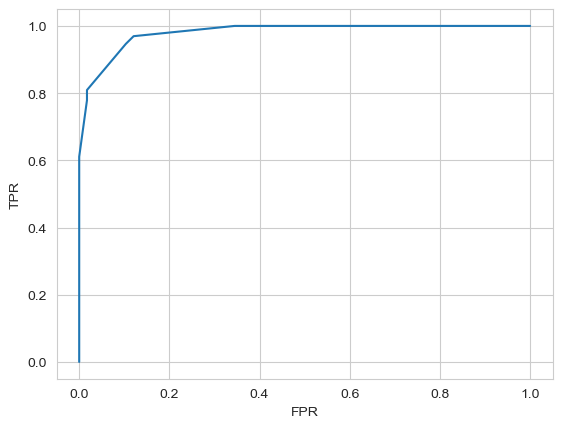

0.98006054224796

In [35]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
auc(fpr, tpr)

##### Висновок.
Як бачимо, наша модель не дає ідеальних прогнозів при жодних значеннях `threshold` (`ROC-curve` не перетинає точку (0,1)). Але таке значення площі під кривою вважається непоганим результатом. Можемо побачити, що значення `auc(fpr,tpr)` пораховане таким способом відрізняється від метрики `roc_auc`, яку ми знайшли для нашої моделі (хоча вони мали б бути однаковими). Це пов'язано з тим, що ці два методи використовують різні підходи до обрахунку, тому значення може незначно відрізнятись.

#### Precision-Recall curve

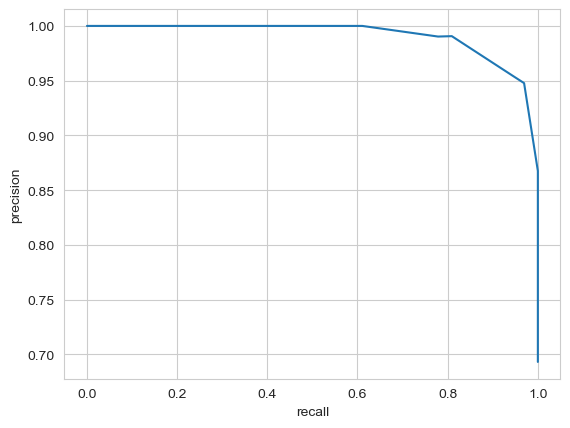

0.9911345862724174

In [36]:
precision, recall, thresholds = precision_recall_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()
auc(recall, precision)

##### Висновок.
Аналогічно можемо побачити, що наша модель не дає ідеальних прогнозів на жодному порозі класифікаії (графік не перетинає точку (1,1)). Хоча таке значення теж вважається хорошим результатом

### Обрати найкращу модель яка розв'язує задачу класифікації. Для найкращої моделі знайти прогнози на вибірці `predict.csv`. Значення прогнозів та ймовірностей зберегти у файл `predictions_clf.csv`.
    


Ми визначили найкращі моделі для числових і повних ознак. Додатково спробуємо скористатись класифікатором `RandomForest` (Класифікатор, що використовує дерева), який, нариклад, може працювати з категорійними ознаками без `One-Hot` кодування (після спроб навчання з різними кроками виявилось, що One-Hot допомагає отримати кращі результати)

In [37]:
from sklearn.ensemble import RandomForestClassifier
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical),
    ('scaling', StandardScaler(), numeric_features),
    ('binning', KBinsDiscretizer(n_bins=6, strategy='quantile'), numeric_features),
    ('polynoms', PolynomialFeatures(degree=2, include_bias=False), numeric_features)
])
pipeline = Pipeline(steps=[
    ('preprocessing', column_transformer),
    ('regression', RandomForestClassifier(random_state=0, max_depth=7))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)
output(RandomForestClassifier(max_depth=7, random_state=0), y_pred, y_train_pred, all_metrics=True)

----------RandomForestClassifier(max_depth=7, random_state=0)----------
Test Accuracy: 0.9312
Train Accuracy: 0.9563

Test Precision: 0.9538
Train Precision: 0.9571

Test Recall: 0.9466
Train Recall: 0.9751

Test F1: 0.9502
Train F1: 0.966

Test ROC_AUC: 0.9216
Train ROC_AUC: 0.9492


Отримали результати дуже подібні до нашої найкращої моделі, але з покращенням деяких метрик. Побудуємо також крафіки ROC i Precision-Recall кривих і зробимо прогнози на основі цього класифікатора. 

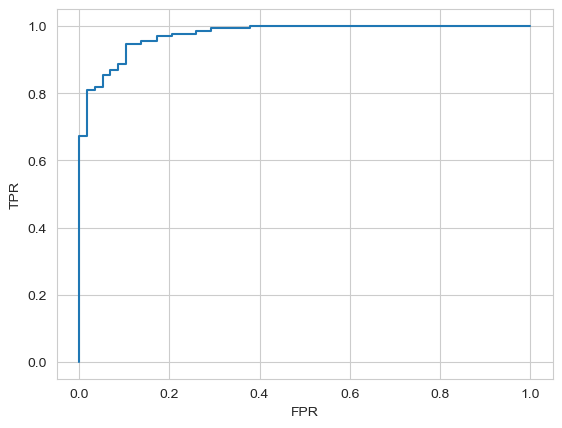

0.9743353514082653

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
auc(fpr, tpr)

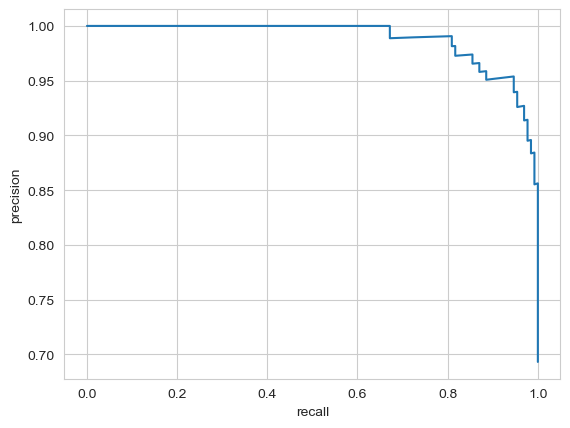

0.9883428532471571

In [39]:
precision, recall, thresholds = precision_recall_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()
auc(recall, precision)

Після спроб з різними параметрами, кроками навчання і різним поділом на навчальну і тестову вибірку, вирішив спробувати замінити predict з моделі RandomForest (оскільки вона не входить у цю роботу) на найкращу LogisticRegression саме з завдання 2 (показала стабільніші результати)

In [40]:
predict = pd.read_csv("predict.csv").astype({"Medu": "object", "Fedu": "object", "traveltime": "object", "studytime": "object", "famrel": "object",
                             "freetime":"object", "goout": "object", "Dalc":"object", "Walc":"object", "health": "object"})
predict["sem"] = predict["sem"].map(lambda sem: 0 if sem < 0 else sem)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=81)
numeric_features = ["absences", "failures", "sem", "age"]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
predict_scaled = scaler.transform(predict[numeric_features])

binn = KBinsDiscretizer(n_bins=6, strategy='quantile')
X_train_preprocessed = binn.fit_transform(X_train_scaled)
predict_preprocessed = binn.transform(predict_scaled)

pol = PolynomialFeatures(degree=2, include_bias=False)
X_train_preprocessed = pol.fit_transform(X_train_preprocessed)
predict_preprocessed = pol.transform(predict_preprocessed)

get_best_params_numeric(log_reg, X_tr=X_train_preprocessed)

log_reg.fit(X_train_preprocessed, y_train)

LogisticRegression(C=0.41320124001153363)

In [42]:
# Зберегти прогнози у змінну best_clf_model_predictions та ймовірності у best_clf_model_predict_proba
best_clf_model_predictions = log_reg.predict(predict_preprocessed)
best_clf_model_predict_proba = log_reg.predict_proba(predict_preprocessed)

for t in zip(best_clf_model_predictions, best_clf_model_predict_proba[:,1]):
    print(*t)

False 0.06883648016273008
False 0.047755108702820896
False 0.10707630842441883
False 0.29816355658025934
False 0.030295722534785855
True 0.9797476890047038
True 0.6727389887115997
True 0.9293582840962947
True 0.9891335653753892
False 0.030318818343633036
False 0.10707630842441883
True 0.7636318913907912
True 0.6732223190687169
True 0.6727389887115997
False 0.10707630842441883
True 0.9787316464299217
True 0.9904731554109579
True 0.9267672004650171
True 0.9006581686621965
False 0.1644780719645501
True 0.9826486638790226
False 0.10707630842441883
False 0.017814152272809317
False 0.4458155052990191
True 0.6244634725700139
True 0.9797476890047038
False 0.37586467680703384
True 0.9160794379520959
True 0.9006581686621965
False 0.08500711977978428
False 0.14880785191926624
True 0.9419295580702729
False 0.10707630842441883
False 0.047755108702820896
True 0.9267672004650171
True 0.9890834740285259
False 0.12331081091236129
True 0.7790371810873464
True 0.9690199964979996
False 0.03120571544306508

In [44]:
# Запустити для створення файлу
pd.DataFrame(zip(best_clf_model_predictions, 
                 best_clf_model_predict_proba[:,1]), 
             columns=['preds', 'probas']).to_csv('predictions_clf.csv')



## Завдання 4. 

[1 бал]

Зберегти результати роботи у jupyter-ноутбук. Ноутбук повинен бути збережений у стані в якому усі клітинки запущені і не містити помилок. Формат назви файлу `М2_Прізвище_Ім'я.ipynb`. 

Окремо додати файл `predictions_clf.csv`.

Додатково можна отримати до [4 балів] за порівняннями результатів найкращих моделей завдань 2 та 3.
